# City Bike Challenge

Based on the data available at [Divvy Data](https://www.divvybikes.com/system-data), how to guess where people usually live and where the usually work?

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## The city

I don't know Chicago. Assuming I'm looking for a restaurant or a bar, where should I go? Let's try to find where I should go to walk in lively places and find a bar...

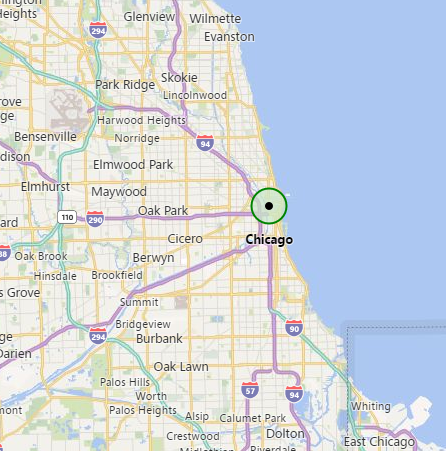

In [3]:
from pyquickhelper.helpgen import NbImage
NbImage("images/chicago.png")

## The data

[Divvy Data](https://www.divvybikes.com/system-data) publishes a sample of the data. 

In [5]:
from pyensae.datasource import download_data
file = download_data("Divvy_Trips_2016_Q3Q4.zip", url="https://s3.amazonaws.com/divvy-data/tripdata/")

We know the stations.

In [6]:
import pandas
stations = df = pandas.read_csv("Divvy_Stations_2016_Q3.csv")
df.head()

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880420,-87.655599,19,6/26/2013


And we know the trips.

In [8]:
bikes = df = pandas.read_csv("Divvy_Trips_2016_Q3.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,12150160,9/30/2016 23:59:58,10/1/2016 00:04:03,4959,245,69,Damen Ave & Pierce Ave,17,Wood St & Division St,Subscriber,Male,1988.0
1,12150159,9/30/2016 23:59:58,10/1/2016 00:04:09,2589,251,383,Ashland Ave & Harrison St,320,Loomis St & Lexington St,Subscriber,Female,1990.0
2,12150158,9/30/2016 23:59:51,10/1/2016 00:24:51,3656,1500,302,Sheffield Ave & Wrightwood Ave,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN
3,12150157,9/30/2016 23:59:51,10/1/2016 00:03:56,3570,245,475,Washtenaw Ave & Lawrence Ave,471,Francisco Ave & Foster Ave,Subscriber,Female,1988.0
4,12150156,9/30/2016 23:59:32,10/1/2016 00:26:50,3158,1638,302,Sheffield Ave & Wrightwood Ave,492,Leavitt St & Addison St,Customer,NaN,NaN


## The challenge

We know how people use bicycles. People, people... it is us. What do I know about myself I could use to explore the data and determines living and working areas of Chicago?

## A few graph

Display the city with two colors. The following shows the stations with more than 20 slots.

In [10]:
from ensae_projects.datainc.data_bikes import folium_html_stations_map
xy = []
for els in stations.apply(lambda row: (row["latitude"], row["longitude"], row["dpcapacity"] >= 20), axis=1):
    xy.append( ( (els[0], els[1]), "red" if els[2] else "blue"))
folium_html_stations_map(xy, width="80%")

<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x25612706780>